EXAMEN FINAL SIS420

PAVON MATIAS HECTOR

EJERCICIO 2

2. Construya un modelo de aprendizaje por refuerzo para resolver un rompecabezas de 4 filas por 5 columnas, de deja a su criterio la utilizacion de librerias o frameworks que desee.

Aqui es donde se define el entorno donde estara el agente y en el cual se movera para realizar el entrenamiento

In [13]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Definimos el tamaño del rompecabezas
ROWS = 4
COLS = 5

# Definimos las acciones posibles: 0: arriba, 1: abajo, 2: izquierda, 3: derecha
ACTIONS = [0, 1, 2, 3]

# Parámetros de aprendizaje
epsilon = 0
alpha = 0.1
gamma = 0.9

# Inicializamos la tabla de acción-valor Q
Q = np.zeros((ROWS, COLS, len(ACTIONS)))

# Definimos una función para seleccionar una acción usando el método epsilon-greedy
def epsilon_greedy(state):
    if random.uniform(0, 1) < epsilon:
        return random.choice(ACTIONS)
    else:
        return np.argmax(Q[state[0], state[1]])

# Definimos una función para obtener el siguiente estado
def next_state(state, action):
    i, j = state
    if action == 0 and i > 0:
        i -= 1
    elif action == 1 and i < ROWS - 1:
        i += 1
    elif action == 2 and j > 0:
        j -= 1
    elif action == 3 and j < COLS - 1:
        j += 1
    return (i, j)

# Definimos una función para obtener la recompensa
def get_reward(state):
    if state == (ROWS - 1, COLS - 1):  # Estado objetivo
        return 100
    else:
        return -1



Este es el codigo del agente, el cual se dedicara a explorar o explotar en baser al epsilon que le asignemos

In [14]:
# Entrenamos el agente
num_episodes = 1000
rewards_per_episode = []

for episode in range(num_episodes):
    # Inicializamos el estado
    state = (0, 0)
    total_reward = 0

    while state != (ROWS - 1, COLS - 1):

        # Seleccionamos una acción
        action = epsilon_greedy(state)

        # Obtenemos el siguiente estado y la recompensa
        next_state_ = next_state(state, action)
        reward = get_reward(next_state_)

        # Actualizamos la tabla Q
        Q[state[0], state[1], action] += alpha * (reward + gamma * np.max(Q[next_state_[0], next_state_[1]]) - Q[state[0], state[1], action])

        # Actualizamos el estado
        state = next_state_

        # Acumulamos la recompensa
        total_reward += reward

    rewards_per_episode.append(total_reward)

# Imprimimos la tabla Q
print("Tabla Q final:")
print(Q)

Tabla Q final:
[[[ -1.82093062  48.45851     -1.82093062  -1.77618724]
  [ -1.22478977  -0.96358757  -1.30488399  -1.18176721]
  [ -0.77255306  -0.40067883  -0.78910488  -0.75334841]
  [ -0.3940399   -0.41344588  -0.43185816  -0.40918779]
  [ -0.29701      1.36849345  -0.20791     -0.29701   ]]

 [[ -1.26790919  -1.19015459  -1.22478977  54.9539    ]
  [ -0.83980071  -0.79288671  -0.86599491  62.171     ]
  [ -0.50524026  70.19        -0.55026097  -0.4529431 ]
  [ -0.2962      -0.28        -0.21601      0.98466839]
  [ -0.199       16.25104151  -0.109       -0.1       ]]

 [[ -0.76002043  -0.78314434  -0.77255306  -0.40483686]
  [ -0.51599059  -0.46285021  -0.52431899   4.47262254]
  [ -0.3043729   -0.28081     -0.2152      79.1       ]
  [ -0.199       89.          -0.109       -0.1       ]
  [ -0.1         56.953279     0.           0.        ]]

 [[ -0.61982507  -0.58519851  -0.58519851  -0.54374734]
  [ -0.40211649  -0.3940399   -0.3211399    0.3522536 ]
  [ -0.199       -0.199    

Dado que el epsilon es 0, el agente se dedica enteramente a exlotar, y en la grafica vemos que el agente una vez encuentra la mejor manera de resolver el puzzle, se dirige por esa opcion cada vez para obtener las recompensas

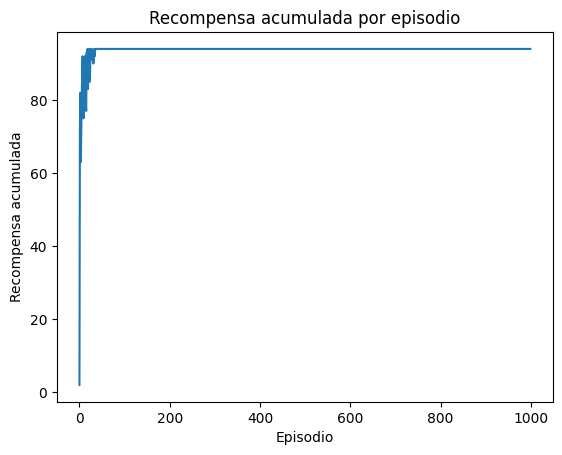

In [12]:
# Graficamos la recompensa acumulada por episodio
plt.plot(rewards_per_episode)
plt.xlabel('Episodio')
plt.ylabel('Recompensa acumulada')
plt.title('Recompensa acumulada por episodio')
plt.show()


Como observamos en el grafico, a medida que transcurren los episodios las recompensas aumentan dado que el agente esta explotando constantemente, por lo tanto obteniendo mayores recompensas

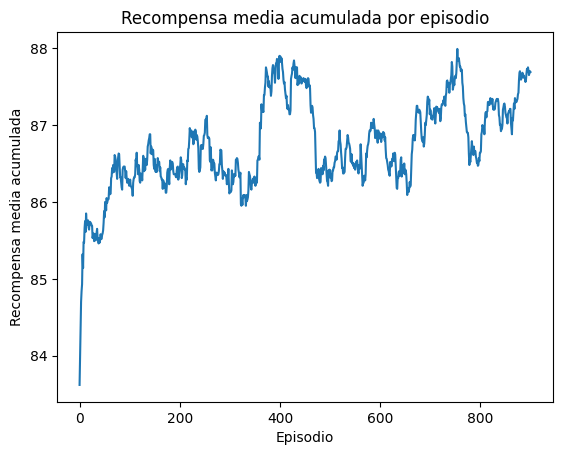

In [4]:
# Calculamos la recompensa media por episodio
mean_rewards = np.convolve(rewards_per_episode, np.ones(100)/100, mode='valid')

# Graficamos la recompensa media por episodio
plt.plot(mean_rewards)
plt.xlabel('Episodio')
plt.ylabel('Recompensa media acumulada')
plt.title('Recompensa media acumulada por episodio')
plt.show()
